 # Trigonometric interpolation
 Given a set of data points $\{\{x_k\},\{y_k\}\}$ where $\{x_k\} = \left\{ \frac{2 \pi k}{N} \in [0,2\pi) \subset \mathbb{R} : k = 0 \ldots N-1 \right\}$ and $\{y_k\} = \left\{ {y_k \in \mathbb{C} : k = 0 \ldots N-1} \right\}$, find a interpolation function $T(x): \mathbb{R} \mapsto \mathbb{C}$ that fulfills the trigonometric interpolation condition
 \begin{equation}
   T(x_k) = y_k \quad \forall k=0 \ldots N-1
 \end{equation}

 ## Packages
 - `IPython.display`: jupyter usage
 - `sympy`: symbolic calculations
 - `numpy`: numeric calculations
 - `matplotlib`: plotting

In [82]:
from IPython.display import display
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


 ## Calculate Discrete Fourier Coefficients
 \begin{equation}
   d_j = \frac{1}{N} \sum_{k=0}^{N-1} y_k e^{-j i x_k} \quad \text{ for } j=0 \ldots N-1
 \end{equation}

In [83]:
def get_coeffs(x, y, debug=False):
  assert len(x) == len(y), "x and y not same length"
  N = len(x)
  d = [
    sp.Add(*[
      1/N * y[k] * sp.exp(- sp.I * j * x[k])
      for k in range(N)
    ], evaluate=not(debug))
    for j in range(N)
  ]
  if debug:
    for i, di in enumerate(d):
      display(sp.Equality(sp.symbols(f"d_{i}"), di, evaluate=False))
  return d


 ## Generate Trigonometric Interpolation Polynom
 Generate the trigonometric polynom as a $d_j$-weighted sum of the basic oscillation (Grundschwingungen) $e^{i j x}$ ($j \in \mathbb{Z}$).
 \begin{equation}
   T_N(x) = \sum_{j=0}^{N-1} d_j e^{i j x}
 \end{equation}

In [84]:
def trig_interp(x, y, debug=False):
  N = len(x)
  d = get_coeffs(x, y, debug)
  x = sp.symbols("x", real=True)
  poly = sum([
    d[j] * sp.exp(sp.I * j * x)
    for j in range(N)
  ])
  return poly, x


 ## Plot the Resulting Complex Function
 Plot the real part and the imaginary part of a function $f:\mathbb{R} \mapsto \mathbb{C}$.

In [85]:
def plot_complex_fct(f, var, x, y, res=0.01):
  assert len(f.free_symbols) == 1

  # convert to float for plot
  x_float = [float(xk.evalf()) for xk in x]
  y_float_re = [float(sp.re(yk).evalf()) for yk in y]
  y_float_im = [float(sp.im(yk).evalf()) for yk in y]

  # x-axis range
  a = x_float[0]
  b = x_float[-1]

  # split real and imaginary and compile
  f_re = sp.lambdify(var, sp.re(f))
  f_im = sp.lambdify(var, sp.im(f))

  # discretize for plot
  xx = np.arange(a, b, res)
  plt.plot(xx, f_re(xx))
  plt.plot(xx, f_im(xx))
  plt.plot(x_float, y_float_re ,'s')
  plt.plot(x_float, y_float_im ,'s')
  plt.legend(["real part", "imaginary part", "real data points", "imaginary data points"])


 ## Example

Eq(x_k, [0, pi/2, pi, 3*pi/2])

Eq(y_k, [2, 0, 2, 0])

Eq(T(x), 1.0*exp(2*I*x) + 1.0)

Eq(\text{Re}(T(x)), 1.0*cos(2*x) + 1.0)

Eq(\text{Im}(T(x)), 1.0*sin(2*x))

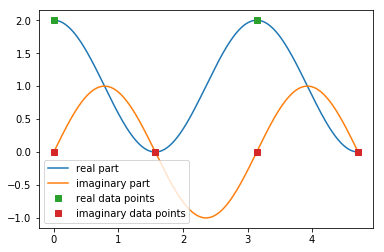

In [86]:
debug = False
N = 4
x_vals = sp.Array([(2*sp.pi*k) / N for k in range(N)])
y_vals = sp.Array([2, 0, 2, 0])
T, var = trig_interp(x_vals, y_vals, debug)
plot_complex_fct(T, var, x_vals, y_vals, res=0.01)
display(sp.Eq(sp.symbols("x_k"), x_vals, evaluate=False))
display(sp.Eq(sp.symbols("y_k"), y_vals, evaluate=False))
display(sp.Eq(sp.symbols("T(x)".format(N)), T, evaluate=False))
display(sp.Eq(sp.symbols(r"\text{Re}(T(x))"), sp.re(T), evaluate=False))
display(sp.Eq(sp.symbols(r"\text{Im}(T(x))"), sp.im(T), evaluate=False))
